# TMDB Movie Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is from Kaggle: 5000 Movie Dataset and contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
The primary goal of this project is to practice pandas, Numpy, and Matplotlib data analysis techniques.


### Questions for Analysis
1) Which genres are most popular from year to year? 
2) How did film budgets change from each decade? 
3) What kinds of properties are associated with movies that have high revenues?

<a id='wrangling'></a>
## Data Wrangling

We will prepare the environment, load and assess dataset.

### General Properties

In [1]:
#import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import and inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#check how many rows and columns
df.shape

(10866, 21)

In [4]:
#Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#how many missing values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#how many duplicated rows
df.duplicated().sum()

1

In [7]:
# checking descriptive statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#lets see different genres and their counts
df['genres'].value_counts()

Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: genres, Length: 2039, dtype: int64


### Data Cleaning

In [9]:
#make a copy of the original dataframe
df1=df.copy()

In [10]:
#drop duplicated rows
df1.drop_duplicates(inplace=True)

In [11]:
#drop unnecessary columns
col = ['id','imdb_id', 'homepage', 'tagline', 'overview','original_title','cast',
       'keywords','overview','production_companies','release_date','budget_adj', 'revenue_adj']
df1.drop(col, axis=1, inplace=True)

In [12]:
#confirm that columns are dropped
df1.head()

,popularity,budget,revenue,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


In [13]:
#drop null values in genres column
drop = ['genres']
df1.dropna(subset=drop,how='any',inplace=True)

In [14]:
#use str.split to split genres
genre_split = df1['genres'].str.split('|').apply(pd.Series,1).stack().reset_index(level=1, drop=True)

In [15]:
#name the new column 
genre_split.name = 'genre'

In [16]:
#use join to combine columns
df1 = df1.drop(['genres'], axis=1).join(genre_split)

In [17]:
#check data to see genres are separated
df1.head(3)

,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,genre
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Action
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Adventure
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Science Fiction


In [18]:
#check for genre categories and their total count
df1['genre'].value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genre, dtype: int64

In [19]:
#above shows that there are 20 genres 
#use unique function to double check 
df1['genre'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [20]:
#create decade column for the df1 
edges = [1959, 1970, 1980, 1990, 2000, 2010, 2016]

#values that fall within the edges will be placed under these names accordingly 
names = ['1960', '1970', '1980', '1990', '2000', '2010']

#use cut to categorize bin values into discrete intervals 
df1['decade'] = pd.cut(df1['release_year'], edges, labels=names)
df1.head()

,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,genre,decade
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Action,2010
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Adventure,2010
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Science Fiction,2010
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Thriller,2010
1,28.419936,150000000,378436354,George Miller,120,6185,7.1,2015,Action,2010


In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   popularity    26955 non-null  float64 
 1   budget        26955 non-null  int64   
 2   revenue       26955 non-null  int64   
 3   director      26864 non-null  object  
 4   runtime       26955 non-null  int64   
 5   vote_count    26955 non-null  int64   
 6   vote_average  26955 non-null  float64 
 7   release_year  26955 non-null  int64   
 8   genre         26955 non-null  object  
 9   decade        26955 non-null  category
dtypes: category(1), float64(2), int64(5), object(2)
memory usage: 2.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Which genres are most popular from year to year?

In [22]:
#make a copy of the df1/cleaned data frame
genre=df1.copy()

In [23]:
#use groupby where first grouping is based on 'release year' and within each release year, group based on 'genre'

genre=genre.groupby(['release_year', 'genre']).size().reset_index(name='count')
genre.head(10)

,release_year,genre,count
0,1960,Action,8
1,1960,Adventure,5
2,1960,Comedy,8
3,1960,Crime,2
4,1960,Drama,13
5,1960,Family,3
6,1960,Fantasy,2
7,1960,Foreign,1
8,1960,History,5
9,1960,Horror,7


In [24]:
genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   release_year  1049 non-null   int64 
 1   genre         1049 non-null   object
 2   count         1049 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 24.7+ KB


In [25]:
#group based on 'release year' but not as new index   
#use apply to accompany the following function; lambda 
#lambda function sorts data frame from the column 'count', minimum being 1 count
#reset_index(drop=True) is used to drop the current index of the df and replace it with index of increaseing integer
popular=genre.groupby(by='release_year', as_index=False).apply(lambda x: x.sort_values('count').tail(1)).reset_index(drop=True)
popular

,release_year,genre,count
0,1960,Drama,13
1,1961,Drama,16
2,1962,Drama,21
3,1963,Drama,13
4,1964,Drama,20
5,1965,Drama,20
6,1966,Comedy,16
7,1967,Comedy,17
8,1968,Drama,20
9,1969,Drama,13


In [26]:
#check for most popular genres
popular['genre'].unique()

array(['Drama', 'Comedy'], dtype=object)

In [27]:
#check how many Drama and Comedy bars to expect on graph
popular['genre'].value_counts()

Drama     47
Comedy     9
Name: genre, dtype: int64

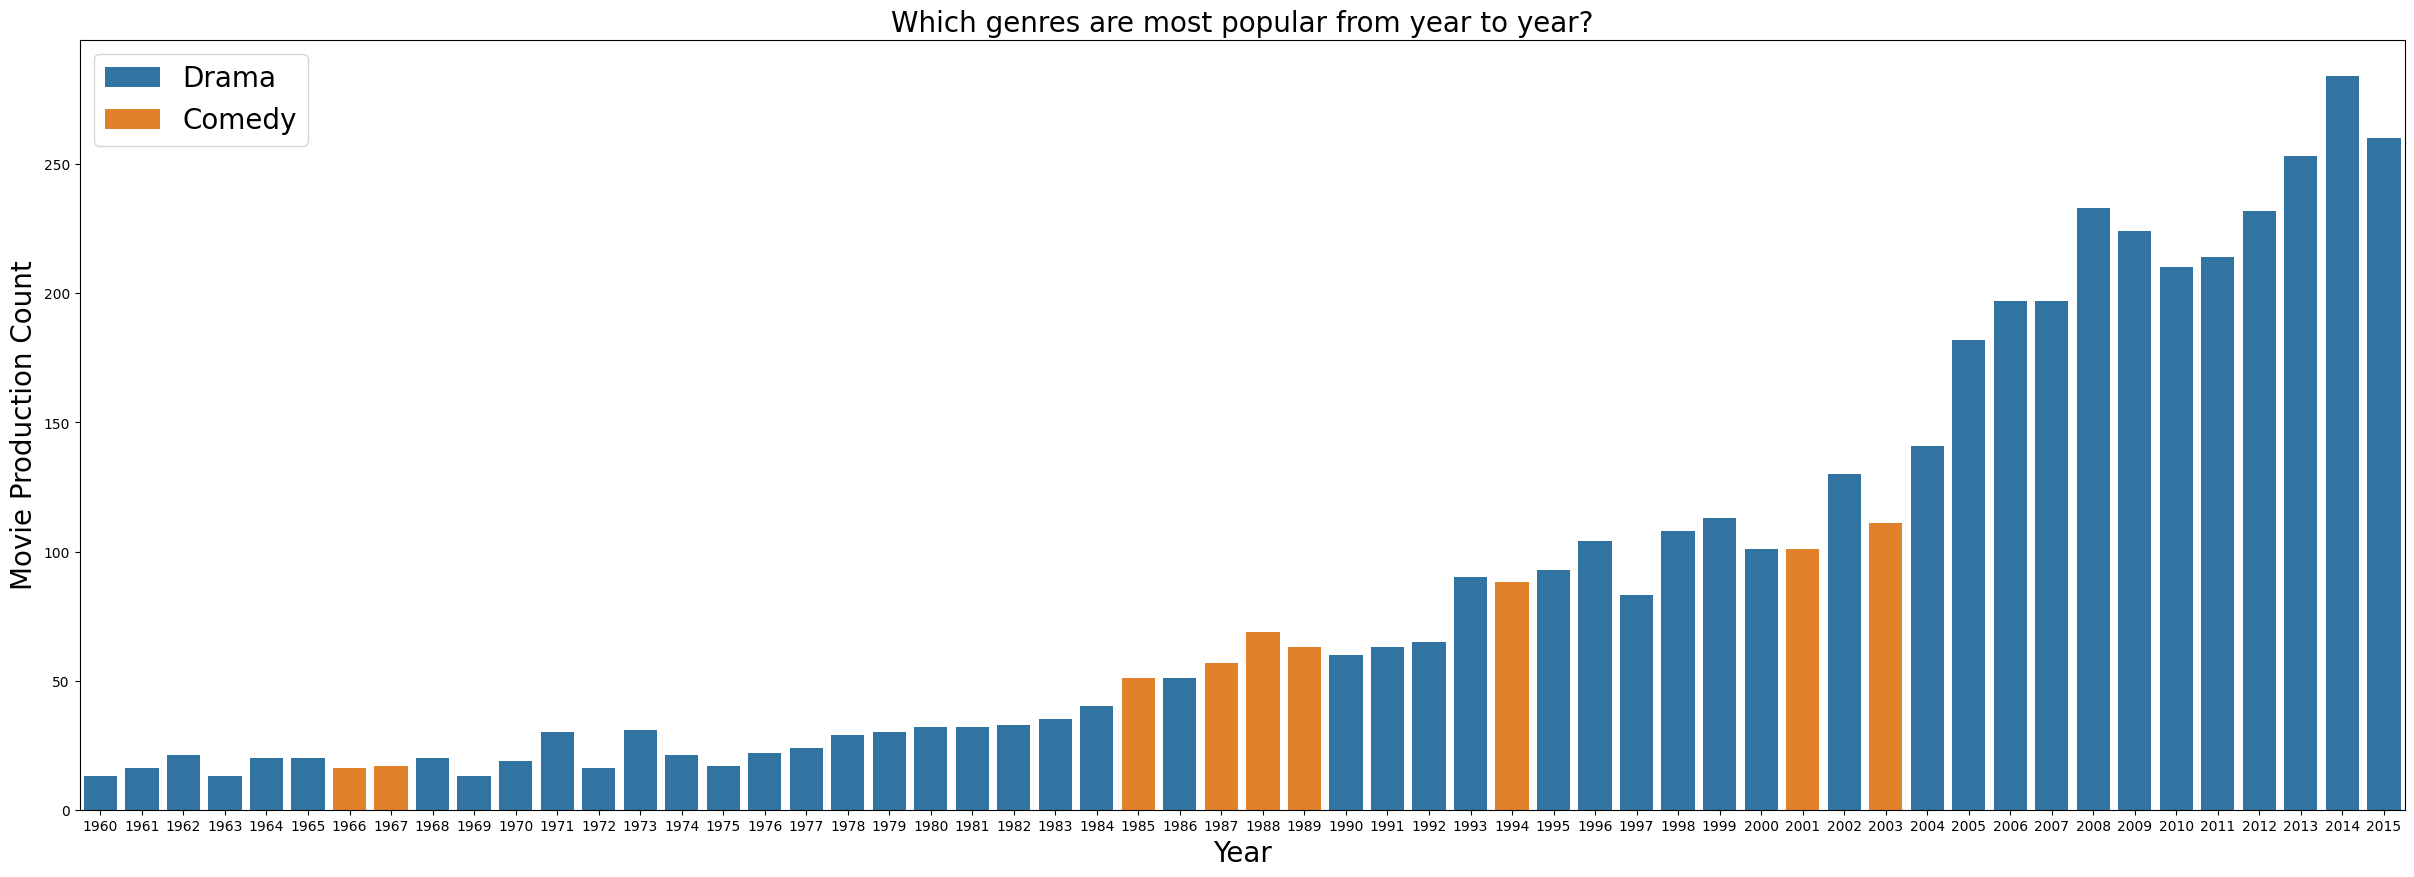

In [28]:
#set figure size
plt.figure(figsize = (30,10))

#use seaborn to barplot with bar color respective to popular genre 
sns.barplot(x = 'release_year', y = 'count', data = popular, hue='genre',dodge=False)

plt.title("Which genres are most popular from year to year?", fontsize = 20)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Movie Production Count", fontsize = 20)
plt.legend(prop={"size":20})

plt.show()

### Answers

1) Top two most popular genres are Drama and Comedy
2) Drama has been most popular generally from year to year





### Question 2 : How did film budgets change from each decade?


In [29]:
#make a copy of the df1/cleaned df
budget = df1.copy()

In [30]:
budget=budget.groupby('decade')['budget'].mean().reset_index(name='budget')
budget

,decade,budget
0,1960,2.202421e+06
1,1970,2.975516e+06
2,1980,7.598380e+06
3,1990,2.039298e+07
4,2000,2.222758e+07
5,2010,1.815299e+07


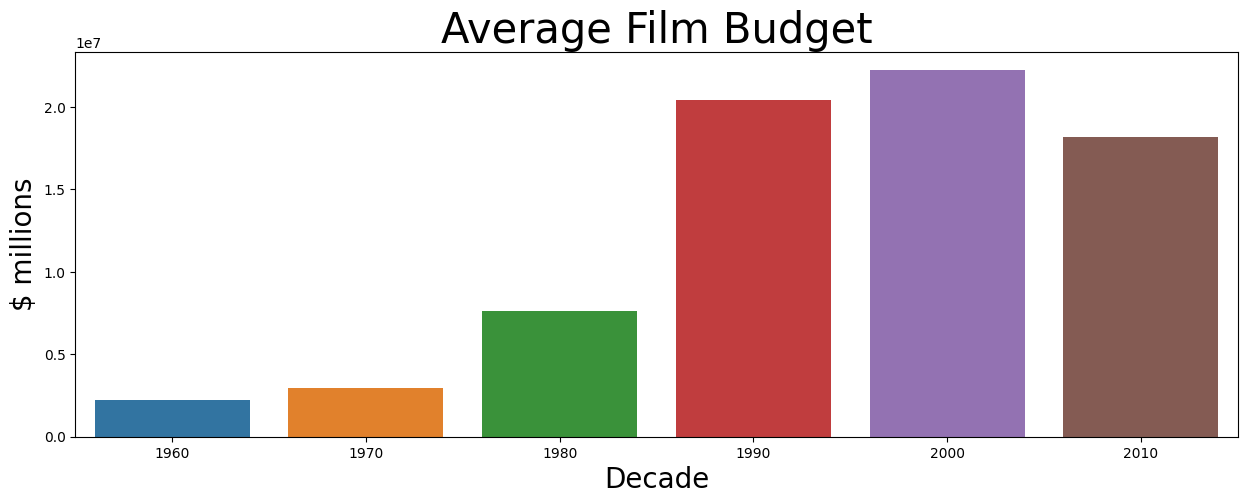

In [31]:
#set figure size 
plt.figure(figsize = (15,5))

#use seaborn to lineplot average film budget per decade 
sns.barplot(x = 'decade', y = 'budget', data = budget)

plt.title("Average Film Budget", fontsize = 30)
plt.xlabel("Decade", fontsize = 20)
plt.ylabel("$ millions", fontsize = 20)


plt.show()

### Answers

1) 1990s has the highest film budget on average while 1970s has the lowest
2) There is an increase in film production budget from 1970s to 1990s
3) There is a decrease in film production budget from 1990s to 2010s

### Question 3: What kinds of properties are associated with movies that have high revenues?

In [32]:
#make a copy of the df1/cleaned df
revenue = df1.copy()
revenue.head()

,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,genre,decade
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Action,2010
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Adventure,2010
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Science Fiction,2010
0,32.985763,150000000,1513528810,Colin Trevorrow,124,5562,6.5,2015,Thriller,2010
1,28.419936,150000000,378436354,George Miller,120,6185,7.1,2015,Action,2010


In [33]:
#makeing new df where it's sorted by decreasing revenue
high_revenue = revenue.sort_values(by = ['revenue'], ascending = [False])
high_revenue.head()

,popularity,budget,revenue,director,runtime,vote_count,vote_average,release_year,genre,decade
1386,9.432768,237000000,2781505847,James Cameron,162,8458,7.1,2009,Action,2000
1386,9.432768,237000000,2781505847,James Cameron,162,8458,7.1,2009,Adventure,2000
1386,9.432768,237000000,2781505847,James Cameron,162,8458,7.1,2009,Fantasy,2000
1386,9.432768,237000000,2781505847,James Cameron,162,8458,7.1,2009,Science Fiction,2000
3,11.173104,200000000,2068178225,J.J. Abrams,136,5292,7.5,2015,Action,2010


In [34]:
#use panda corr function to see correlation of the high_revenue df 
high_rev_corr=high_revenue.corr(numeric_only=True)
high_rev_corr

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
popularity,1.000000,0.541758,0.665801,0.142398,0.794882,0.233379,0.110153
budget,0.541758,1.000000,0.729429,0.201128,0.641743,0.101052,0.147880
revenue,0.665801,0.729429,1.000000,0.171686,0.798649,0.195299,0.081189
runtime,0.142398,0.201128,0.171686,1.000000,0.174363,0.158572,-0.135148
vote_count,0.794882,0.641743,0.798649,0.174363,1.000000,0.279316,0.131383
vote_average,0.233379,0.101052,0.195299,0.158572,0.279316,1.000000,-0.125364
release_year,0.110153,0.147880,0.081189,-0.135148,0.131383,-0.125364,1.000000


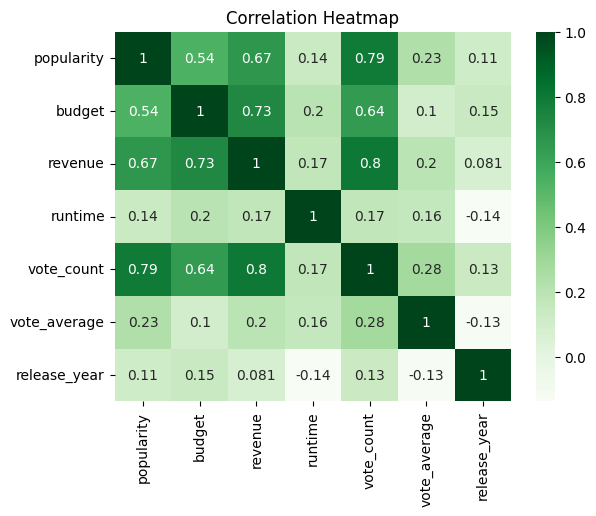

In [35]:
#use seaborn to visualize the correlation above 
sns.heatmap(high_rev_corr, xticklabels=True, annot=True, cmap='Greens')
plt.title('Correlation Heatmap')
plt.show()

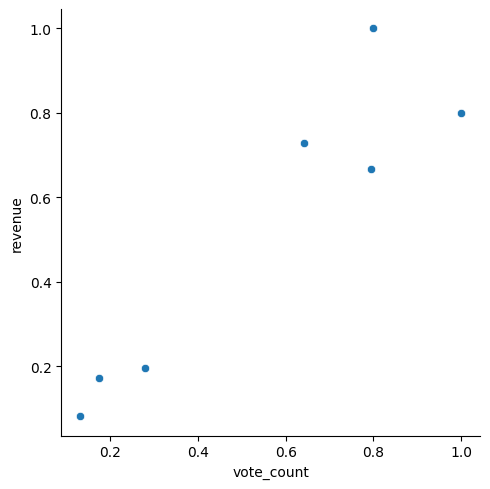

In [36]:
#vote count has highest correlation of 0.8
sns.relplot(x='vote_count', y='revenue', data=high_rev_corr, kind="scatter")
plt.show()

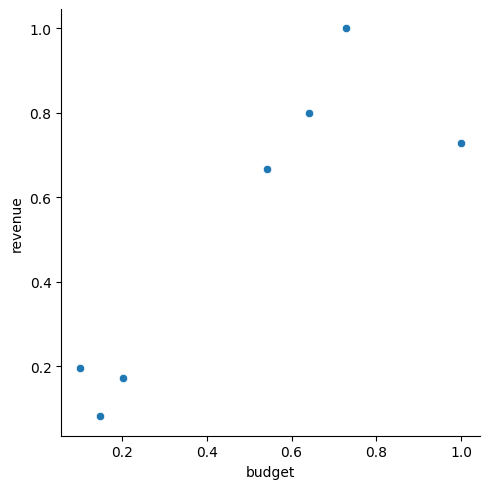

In [37]:
#budget has second highest correlation of 0.73
sns.relplot(x='budget', y='revenue', data=high_rev_corr, kind="scatter")
plt.show()

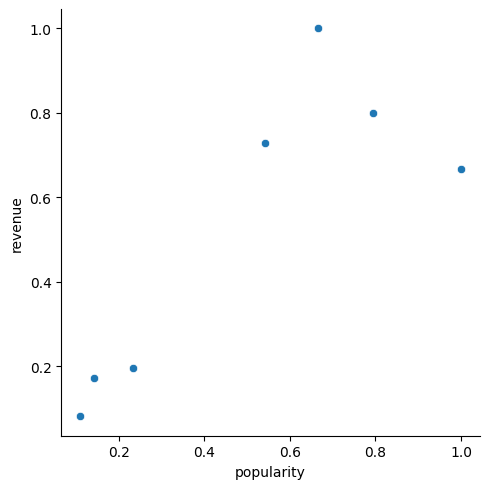

In [38]:
#popularity has the 3rd highest correlation of 0.67
sns.relplot(x='popularity', y='revenue', data=high_rev_corr, kind="scatter")
plt.show()

### Answer

Vote Count, Budget, and Popularity Points show highest association with movies that have high revenues

<a id='conclusions'></a>
## Conclusions

### Summary

1) The top two most popular genres are Drama and Comedy.
2) Drama has been most popular generally from 1960 to 2015.
3) 1990s has the highest film budget on average while 1970s has the lowest.
4) There is an increase in budget from 1970s to 1990s.
5) There is a decrease in budget from 1990s to 2010s.
6) Vote Count, Budget, and Popularity has highest association with the movies that have high revenues.


### Limitations:
1) The dataset contains null and zero values in some features. These zero and null values hinders the analysis and have to be removed. so data cleaning is a necessary part before moving on to the dataset's investigation.
2) There were multiple genres in each movie, I split the genress so each genre is allocated to 1 row.
3) The revenue and budget were not denominated in currency, so it’s unsure whether they are in USD, or another currency.

In [41]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 578372 bytes to Investigate_a_Dataset.html
